## Benchmark Charts + Analysis

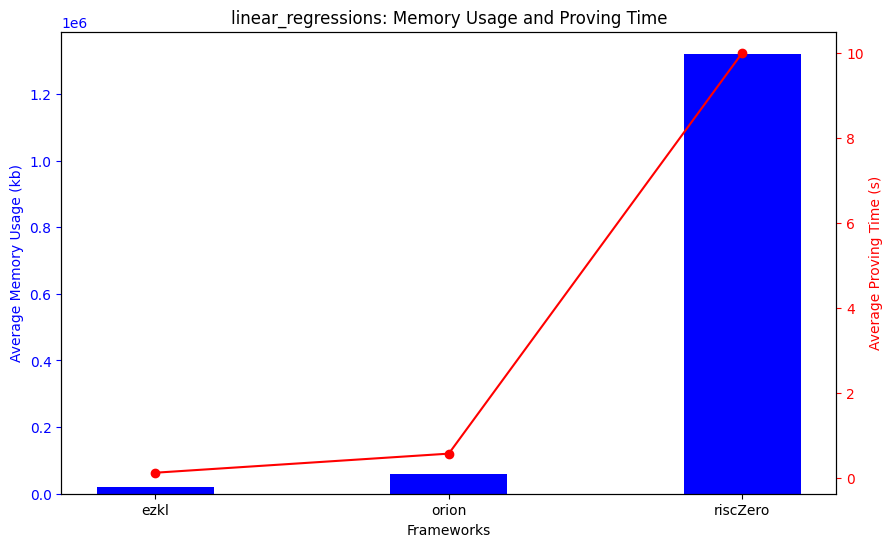


        linear_regressions Results:

        Proving Time Speedup:

        EZKL is approximately 4.82468085106383 times faster than Orion.
        EZKL is about 85.15094246723403 times faster than RISC0.

        Memory Usage Reduction:

        EZKL uses roughly 67.06135776464413% less memory compared to Orion.
        EZKL's memory usage is about 98.53647957916519% less than that of RISC0.
        


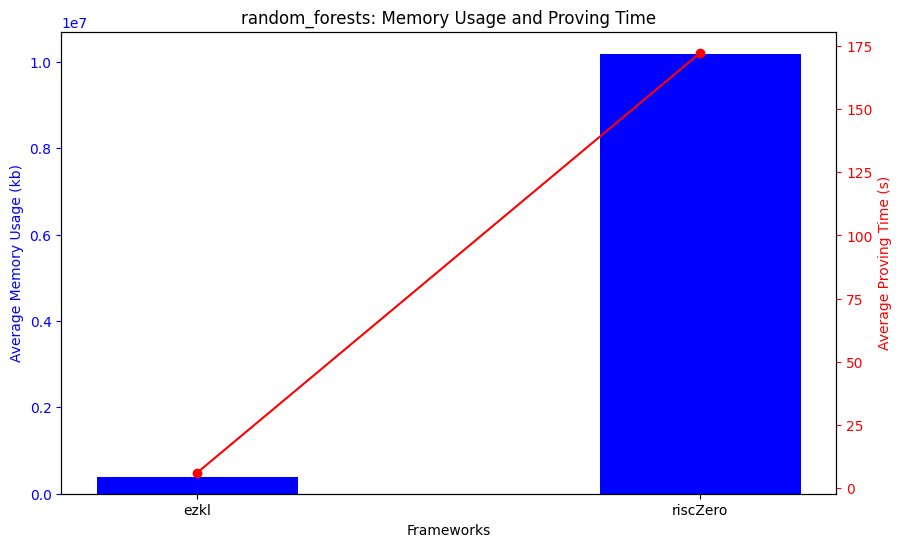


        random_forests Results:

        Proving Time Speedup:

        EZKL is about 28.697711063441844 times faster than RISC0.

        Memory Usage Reduction:

        EZKL's memory usage is about 96.2407534549204% less than that of RISC0.
        


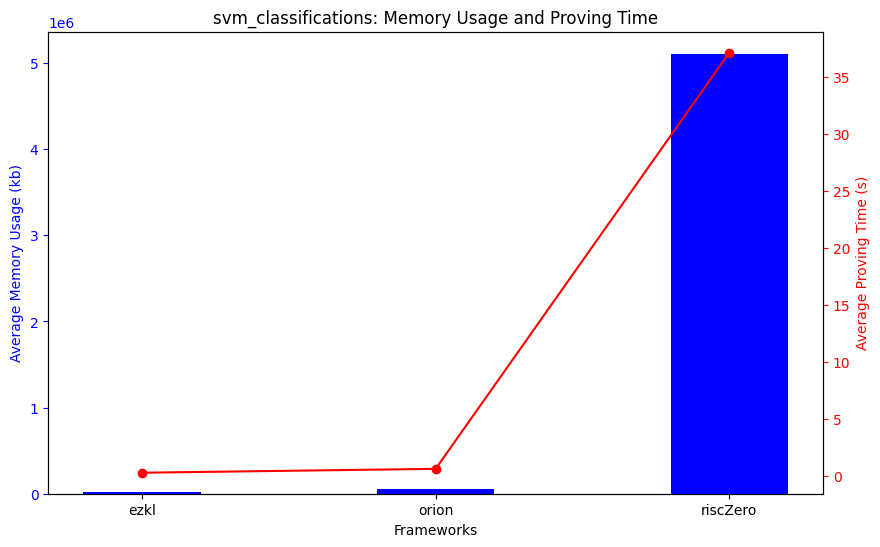


        svm_classifications Results:

        Proving Time Speedup:

        EZKL is approximately 2.0902399999999997 times faster than Orion.
        EZKL is about 118.82278454207999 times faster than RISC0.

        Memory Usage Reduction:

        EZKL uses roughly 59.797989423031105% less memory compared to Orion.
        EZKL's memory usage is about 99.53733936689295% less than that of RISC0.
        


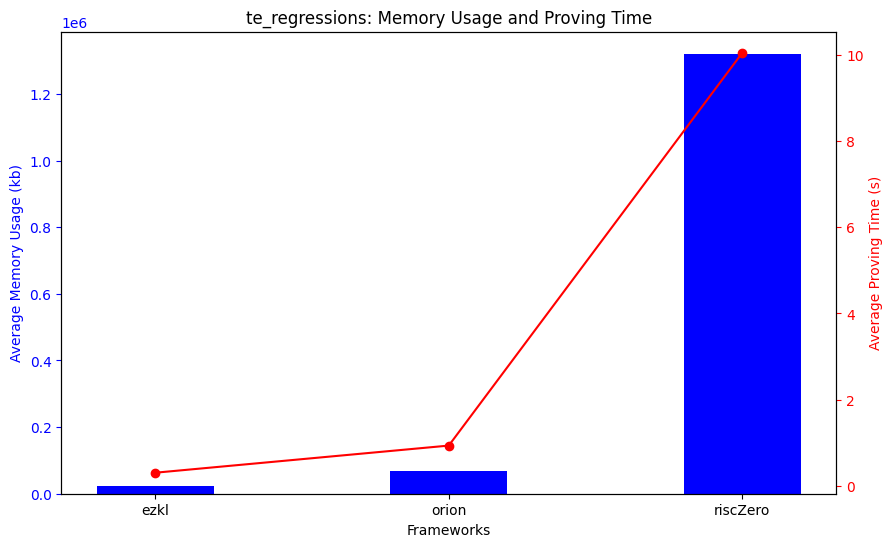


        te_regressions Results:

        Proving Time Speedup:

        EZKL is approximately 3.0833333333333344 times faster than Orion.
        EZKL is about 33.239083473875674 times faster than RISC0.

        Memory Usage Reduction:

        EZKL uses roughly 65.00177535803054% less memory compared to Orion.
        EZKL's memory usage is about 98.20936176191051% less than that of RISC0.
        


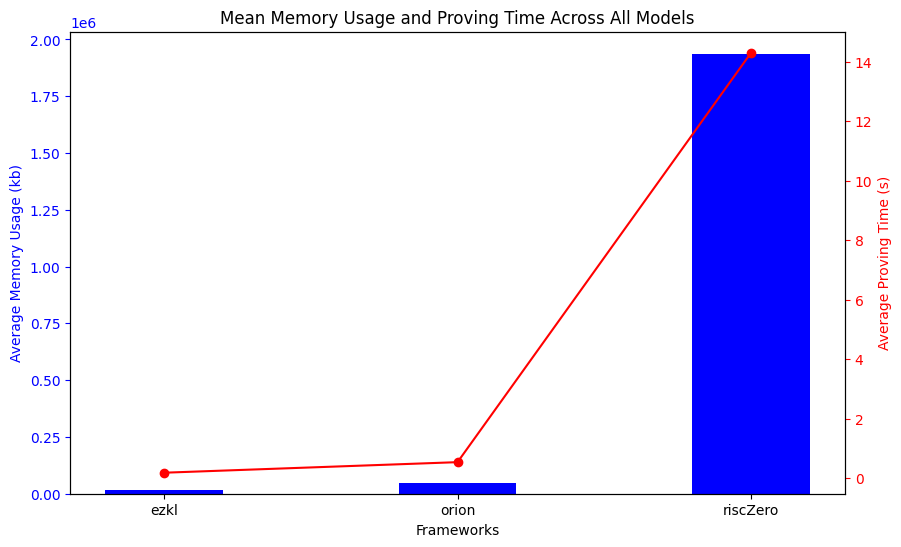


Mean Results:

Proving Time Speedup:

EZKL is approximately 2.938967777170945 times faster than Orion.
EZKL is about 78.08418180202077 times faster than RISC0.

Memory Usage Reduction:

EZKL uses roughly 64.0021616947687% less memory compared to Orion.
EZKL's memory usage is about 99.14033144676301% less than that of RISC0.



In [65]:
import matplotlib.pyplot as plt
import numpy as np
import json

# load benchmarks.jsos file
with open('../benchmarks.json') as f:
    data = json.load(f)

def render_model_data(data, model) -> (dict, dict) :
    # Preprocessing data
    # if model is equal to 'random_forests', we skip orion because it does not support random forests
    if model == 'random_forests':
        frameworks = ['ezkl', 'riscZero']
    else:
        frameworks = ['ezkl', 'orion', 'riscZero']
    memory_usage = {framework: np.mean([int(mu.replace('kb', '')) for mu in data[model][framework]['memoryUsage']]) for framework in frameworks}
    proving_time = {framework: np.mean([float(pt.replace('s', '')) for pt in data[model][framework]['provingTime']]) for framework in frameworks}

    # Creating the bar chart
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar chart for memory usage
    ax1.bar(np.arange(len(frameworks)), list(memory_usage.values()), color='b', width=0.4, align='center')
    ax1.set_xlabel('Frameworks')
    ax1.set_ylabel('Average Memory Usage (kb)', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_xticks(np.arange(len(frameworks)))
    ax1.set_xticklabels(frameworks)

    # Line chart for proving time
    ax2 = ax1.twinx()
    ax2.plot(np.arange(len(frameworks)), list(proving_time.values()), color='r', marker='o')
    ax2.set_ylabel('Average Proving Time (s)', color='r')
    ax2.tick_params('y', colors='r')

    title = f'{model}: Memory Usage and Proving Time'

    # Title and show
    plt.title(title)
    plt.show()

    # Calculating the relative performance and memory usage of EZKL compared to Orion and RISC0

    # Proving time comparison
    proving_time_speedup_risczero = proving_time['riscZero'] / proving_time['ezkl']

    # Memory usage comparison
    memory_usage_reduction_risczero = (memory_usage['riscZero'] - memory_usage['ezkl'])*100 / memory_usage['riscZero']

    if model != 'random_forests':
        # Proving time comparison
        proving_time_speedup_orion = proving_time['orion'] / proving_time['ezkl']
        # Memory usage comparison
        memory_usage_reduction_orion = (memory_usage['orion'] - memory_usage['ezkl'])*100 / memory_usage['orion']
        # Results
        statement = f"""
        {model} Results:

        Proving Time Speedup:

        EZKL is approximately {proving_time_speedup_orion} times faster than Orion.
        EZKL is about {proving_time_speedup_risczero} times faster than RISC0.

        Memory Usage Reduction:

        EZKL uses roughly {memory_usage_reduction_orion}% less memory compared to Orion.
        EZKL's memory usage is about {memory_usage_reduction_risczero}% less than that of RISC0.
        """
    else:
        statement = f"""
        {model} Results:

        Proving Time Speedup:

        EZKL is about {proving_time_speedup_risczero} times faster than RISC0.

        Memory Usage Reduction:

        EZKL's memory usage is about {memory_usage_reduction_risczero}% less than that of RISC0.
        """

    print(statement)
    return (memory_usage, proving_time)

models = ['linear_regressions', 'random_forests', 'svm_classifications', 'te_regressions']
frameworks = ['ezkl', 'orion', 'riscZero']

# Dictionaries to store accumulated values
total_memory_usage = {}
total_proving_time = {}

# Processing each model
for model in models:
    memory_usage, proving_time = render_model_data(data, model)
    #skip random forests for orion
    if model == 'random_forests': continue
    # Accumulating memory usage and proving time
    for framework, mu in memory_usage.items():
        total_memory_usage[framework] = total_memory_usage.get(framework, 0) + mu

    for framework, pt in proving_time.items():
        total_proving_time[framework] = total_proving_time.get(framework, 0) + pt

# Calculating the mean values
mean_memory_usage = {framework: mu / len(models) for framework, mu in total_memory_usage.items()}
mean_proving_time = {framework: pt / len(models) for framework, pt in total_proving_time.items()}

# Creating the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for memory usage
ax1.bar(np.arange(len(frameworks)), list(mean_memory_usage.values()), color='b', width=0.4, align='center')
ax1.set_xlabel('Frameworks')
ax1.set_ylabel('Average Memory Usage (kb)', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(np.arange(len(frameworks)))
ax1.set_xticklabels(frameworks)

# Line chart for proving time
ax2 = ax1.twinx()
ax2.plot(np.arange(len(frameworks)), list(mean_proving_time.values()), color='r', marker='o')
ax2.set_ylabel('Average Proving Time (s)', color='r')
ax2.tick_params('y', colors='r')

title = 'Mean Memory Usage and Proving Time Across All Models'

# Title and show
plt.title(title)
plt.show()

statement = f"""
Mean Results:

Proving Time Speedup:

EZKL is approximately {mean_proving_time['orion'] / mean_proving_time['ezkl']} times faster than Orion.
EZKL is about {mean_proving_time['riscZero'] / mean_proving_time['ezkl']} times faster than RISC0.

Memory Usage Reduction:

EZKL uses roughly {(mean_memory_usage['orion'] - mean_memory_usage['ezkl'])*100 / mean_memory_usage['orion']}% less memory compared to Orion.
EZKL's memory usage is about {(mean_memory_usage['riscZero'] - mean_memory_usage['ezkl'])*100 / mean_memory_usage['riscZero']}% less than that of RISC0.
"""
print(statement)